In [ ]:
import os
os.environ['USE_PYGEOS'] = '0'

In [2]:
from path import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import geopandas
from geopandas import sjoin

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/cm/dxwv2v512jvdqq0n4y_wjcl40000gn/T/ipykernel_12784/1990428743.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.rea

In [3]:
# path configuration
working_directory = Path.getcwd()
inputs_path = working_directory / 'inputs'
outputs_path = working_directory / 'outputs'

In [4]:
# export function
def to_file(callback, desired_name, extension='csv'):
    current_files = sorted(outputs_path.files(desired_name + '*.' + extension))
    if current_files:
        last_file = current_files[-1]
        os.remove(last_file)
    final_name = '{}.{}'.format(desired_name, extension)
    callback(outputs_path / final_name)

In [8]:
# set data path
geo_path =inputs_path/ 'Zoning_fresno.geojson'

# read in frame
geo = geopandas.read_file(geo_path)

In [41]:
slim_geo = geo[['ZoningDescription','District','SHAPE_Length','SHAPE_Area','Acres','geometry']]

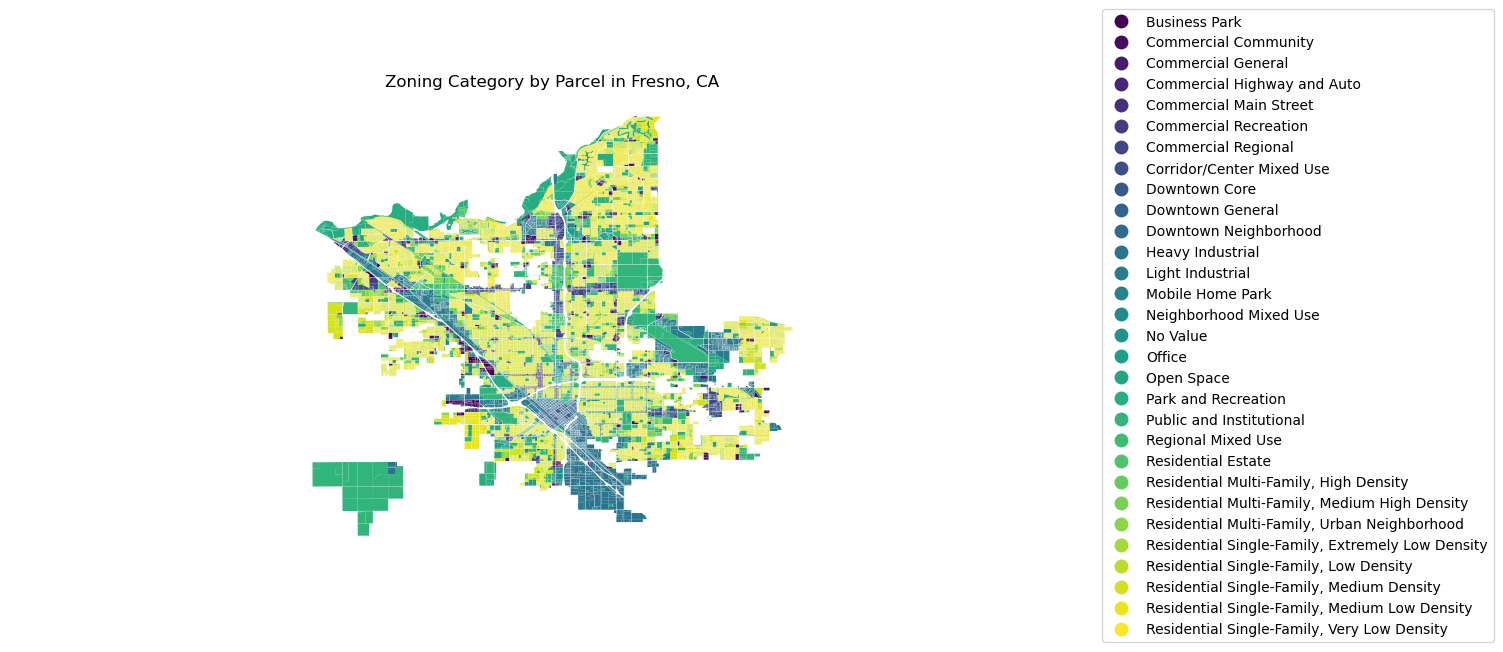

In [88]:
# create zoning map
zoning = slim_geo[['ZoningDescription','geometry']]

# Setup figure and ax
f, ax = plt.subplots(1, figsize=(14, 6))
# Plot unique values choropleth including a legend and with no boundary lines
zoning.plot(column='ZoningDescription', categorical=True, legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)}, linewidth=0,alpha=1, k=7, cmap=plt.cm.viridis,edgecolor='w',  ax=ax)
# Remove axis
ax.set_axis_off()
# set facecolor
ax.set_facecolor('#D5E3D8')
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Zoning Category by Parcel in Fresno, CA')
# Display the map
plt.savefig('Zoning_Fresno.png', bbox_inches='tight')
plt.show()

In [59]:
callback = lambda p: slim_geo.to_file(p, driver='GeoJSON')
to_file(callback, 'Fresno_CA Zoning', 'json')